In [ ]:
"""
### Assignment 3: Convolution via FFT (1D)
**Duration:** 60-75 minutes  
**Difficulty:** ⭐⭐⭐☆☆

#### Objectives
- Verify and implement the convolution theorem
- Understand computational complexity advantages of FFT
- Handle practical issues: zero-padding, circular convolution

#### Tasks
1. **Direct convolution implementation:**
   ```python
   def direct_convolution(x, h):
       # Implement y[n] = Σ x[k]h[n-k] directly
       pass
   ```

2. **FFT-based convolution:**
   ```python
   def fft_convolution(x, h):
       # Implement using: IFFT(FFT(x) * FFT(h))
       # Handle zero-padding for linear convolution
       pass
   ```

3. **Test signals:**
   - Input: rectangular pulse, exponential decay, Gaussian pulse
   - Impulse responses: low-pass filter, differentiator, moving average

4. **Comparison and validation:**
   - Compare outputs of both methods (should be identical)
   - Measure execution time for different signal lengths
   - Plot computational complexity (N log N vs N²)
   - Handle edge cases and circular convolution artifacts

5. **Advanced challenge:**
   - Implement overlap-add method for long signals
   - Demonstrate real-time filtering simulation

#### Expected Output
- Functions: `direct_convolution()`, `fft_convolution()`, `overlap_add()`
- Plots: Convolution results, timing comparisons, complexity analysis
- Validation: Numerical accuracy verification between methods

#### Key Insights to Gain
- Convolution theorem enables efficient filtering
- Zero-padding is crucial for linear convolution
- FFT becomes advantageous for longer signals

---
"""

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def plot_function(
    x: np.ndarray, 
    y: np.ndarray, 
    title: str, 
    x_title: str | None = None, 
    y_title: str | None = None
):
    fig, ax = plt.subplots()
    ax.plot(x, y, markeredgewidth=1)
    ax.set_title(title)
    if y_title:
        ax.set_ylabel(y_title)
    if x_title:
        ax.set_xlabel(x_title)

    plt.show()

def plot_multiple(pairs: list[tuple[np.ndarray, np.ndarray]], title: str):
    fig, ax = plt.subplots()
    for x, y in pairs:
        ax.plot(x, y, markeredgewidth=1)
    ax.set_title(title)
    # if y_title:
    #     ax.set_ylabel(y_title)
    # if x_title:
    #     ax.set_xlabel(x_title)
    plt.show()

In [32]:
f = 5 # frequency
fs  = 2 * f 
duration = 2 
N = fs * duration # amount of samples 
# t = np.arange(N)
# x = np.cos(2 * np.pi * f * n / fs)
t = np.linspace(0,1, N, endpoint=False)
x  = np.sin( 2 * np.pi * f * t ) + 0.5 * np.sin( 2 * np.pi * 2 * f * t)




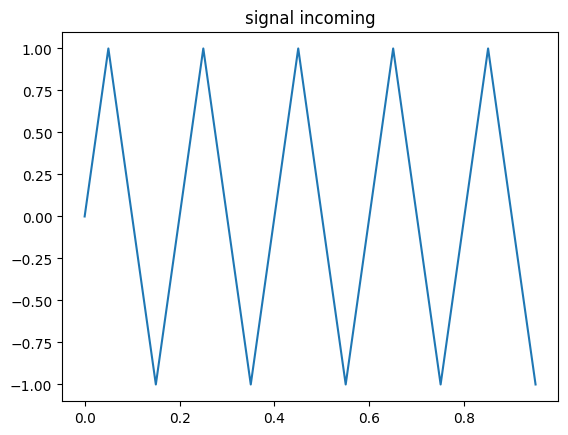

In [33]:
plot_function(
    t, x, 'signal incoming'
)

In [36]:
# different filters to try:

# 1. Moving Average
h_smooth = np.ones(5) / 5

# 2. Difference filter
h_diff = np.array([1, -1]) # highlights changes in signal

# 3. Gaussian filter (smooth bell curve)
h_gauss = np.array([1, 4, 6, 4, 1]) / 16 # smooth bluring with more weight on center

# 4. Echo/Delay filter
h_echo = np.array([1, 0, 0, 0, 0.5]) # original + 50% echo after 4 samples

# 5. Simple impulse
h_impulse = np.array([1])  # identity - output = input

# 6. Low-pass filter (removes high freq)
h_lowpass = np.array([0.1, 0.2, 0.4, 0.2, 0.1]) # removes rapid changes







In [37]:


def direct_convolution(x, h) -> np.ndarray:
    # Implement y[n] = Σ x[k]h[n-k] directly
    N = len(x)
    M = len(h)
    y = np.zeros( N + M - 1)

    for n in range(len(y)):
        for k in range(N):
            if  0 <= n - k < M:
                y[n] += x[k] * h[n-k]
    return y


    


In [40]:
def test_direct_filters(x: np.ndarray, filters: list[tuple[str, np.ndarray]]) -> None:

    fix, axes = plt.subplots(nrows=len(filters), ncols=2, figsize=(12, 10))
    for idx, (name, h) in enumerate(filters):
        y = direct_convolution(x, h)
        # plot filter
        axes[idx, 0].stem(h)
        axes[idx, 0].set_title(f'{name} Filter h')
        axes[idx, 0].set_xlabel('Sample')

        # plot result
        axes[idx, 1].plot(x[:50], 'b-', alpha=0.5)
        axes[idx, 1].plot(y[:50], 'r-', label='Convolved')
        axes[idx, 1].set_title(f'Result of {name}')
        axes[idx, 1].legend()
    plt.tight_layout()
    plt.show()






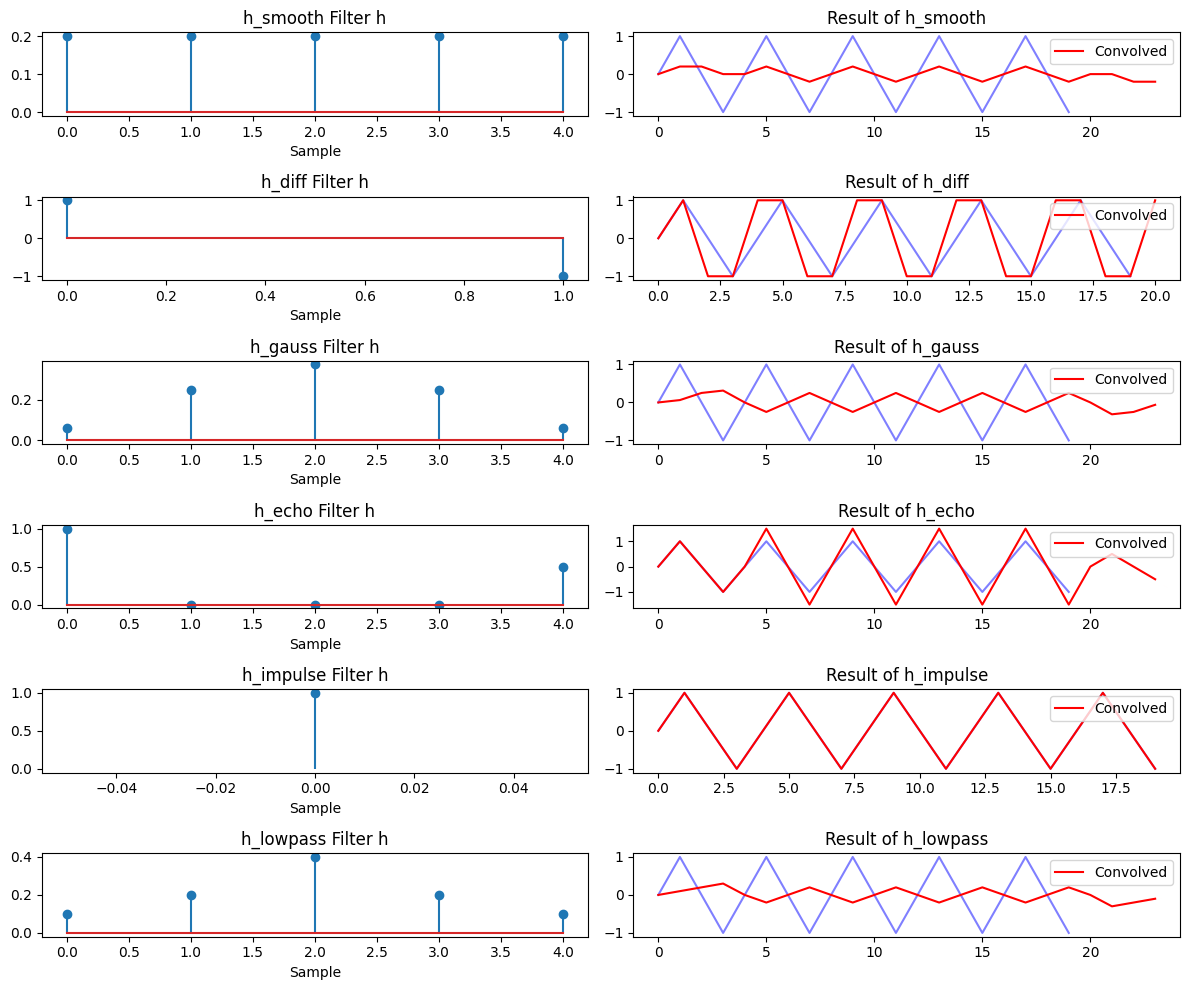

In [41]:
filters = [
    ('h_smooth', h_smooth),
    ('h_diff', h_diff),
    ('h_gauss', h_gauss),
    ('h_echo', h_echo),
    ('h_impulse', h_impulse),
    ('h_lowpass', h_lowpass),
]

test_direct_filters(x, filters)

In [42]:
def fft_convolution(x: np.ndarray, h: np.ndarray) -> np.ndarray:
    # Implement using: IFFT(FFT(x) * FFT(h))
    # Handle zero-padding for linear convolution
    return np.fft.ifft(np.fft.fft(x) * np.fft.fft(h))

In [ ]:
def test_fft_filters(x: np.ndarray, filters: list[tuple[str, np.ndarray]]) -> None:

    fix, axes = plt.subplots(nrows=len(filters), ncols=2, figsize=(12, 10))
    for idx, (name, h) in enumerate(filters):
        y = fft_convolution(x, h)
        # plot filter
        axes[idx, 0].stem(h)
        axes[idx, 0].set_title(f'{name} Filter h')
        axes[idx, 0].set_xlabel('Sample')

        # plot result
        axes[idx, 1].plot(x[:50], 'b-', alpha=0.5)
        axes[idx, 1].plot(y[:50], 'r-', label='Convolved')
        axes[idx, 1].set_title(f'Result of {name}')
        axes[idx, 1].legend()
    plt.tight_layout()
    plt.show()






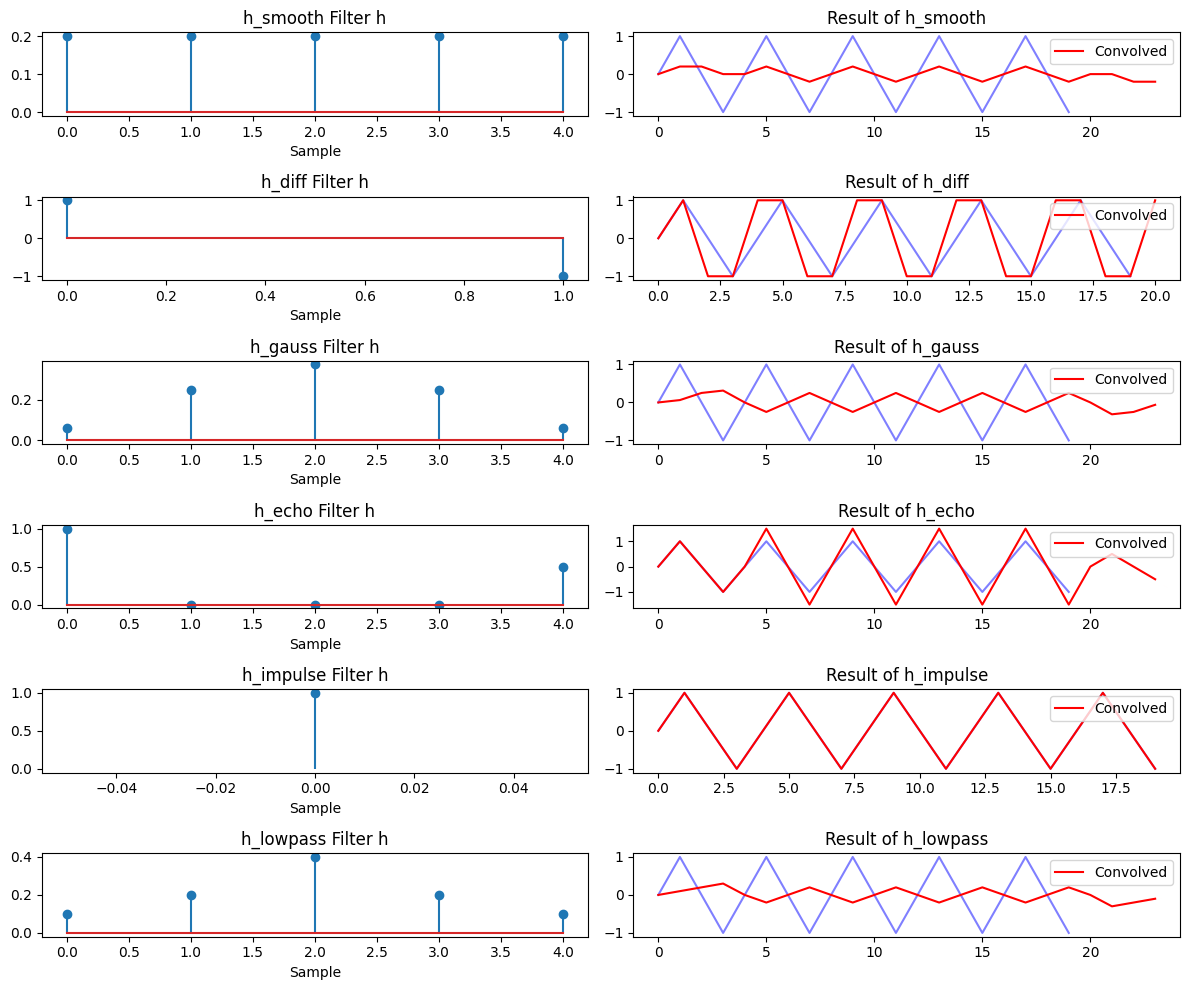

In [43]:
test_direct_filters(x, filters)